In [1]:
import numpy as np
import pandas as pd

In [2]:
repo_data = pd.read_csv('research_dataset.csv')

In [3]:
repo_data.columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

In [4]:
repo_data.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [5]:
repo_data['repositories'].value_counts()

kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64

In [6]:
repo_data['language'].value_counts()

JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionScript    

In [7]:
numeric_data = pd.DataFrame(repo_data, columns=['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors'])
numeric_data.head()

,stars_count,forks_count,issues_count,pull_requests,contributors
0,0,0,612,316,2
1,271,150,536,6,71
2,0,0,313,27,154
3,0,0,290,30,434
4,0,589,202,22,67


In [8]:
numeric_data.describe()

,stars_count,forks_count,issues_count,pull_requests,contributors
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,81.976236,53.884981,8.656844,4.374525,8.364068
std,170.403116,127.699729,32.445154,27.913732,37.511807
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


In [9]:
repo_data.isna().sum()

repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64

In [10]:
language_counts = pd.DataFrame(repo_data['language'].value_counts()).sort_values(by='language', ascending=False).rename(columns={'language': 'language_count'})
language_counts

,language_count
JavaScript,253
Python,155
HTML,72
Java,44
CSS,37
TypeScript,37
Dart,36
C++,29
Jupyter Notebook,29
Ruby,28


In [11]:
language_highest_freq = language_counts.index[0]
language_highest_freq

'JavaScript'

In [12]:
repo_data_hf_replaced = repo_data.replace(np.nan,language_highest_freq)
repo_data_hf_replaced

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


In [13]:
repo_data_hf_replaced.isna().sum()

repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aryan\AppData\Local\Temp\ipykernel_1372\777639838.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(repo_data_hf_replaced.corr(method='spearman'), cmap='YlGnBu', annot=True)


Text(0.5, 1.0, 'Correlation Analysis')

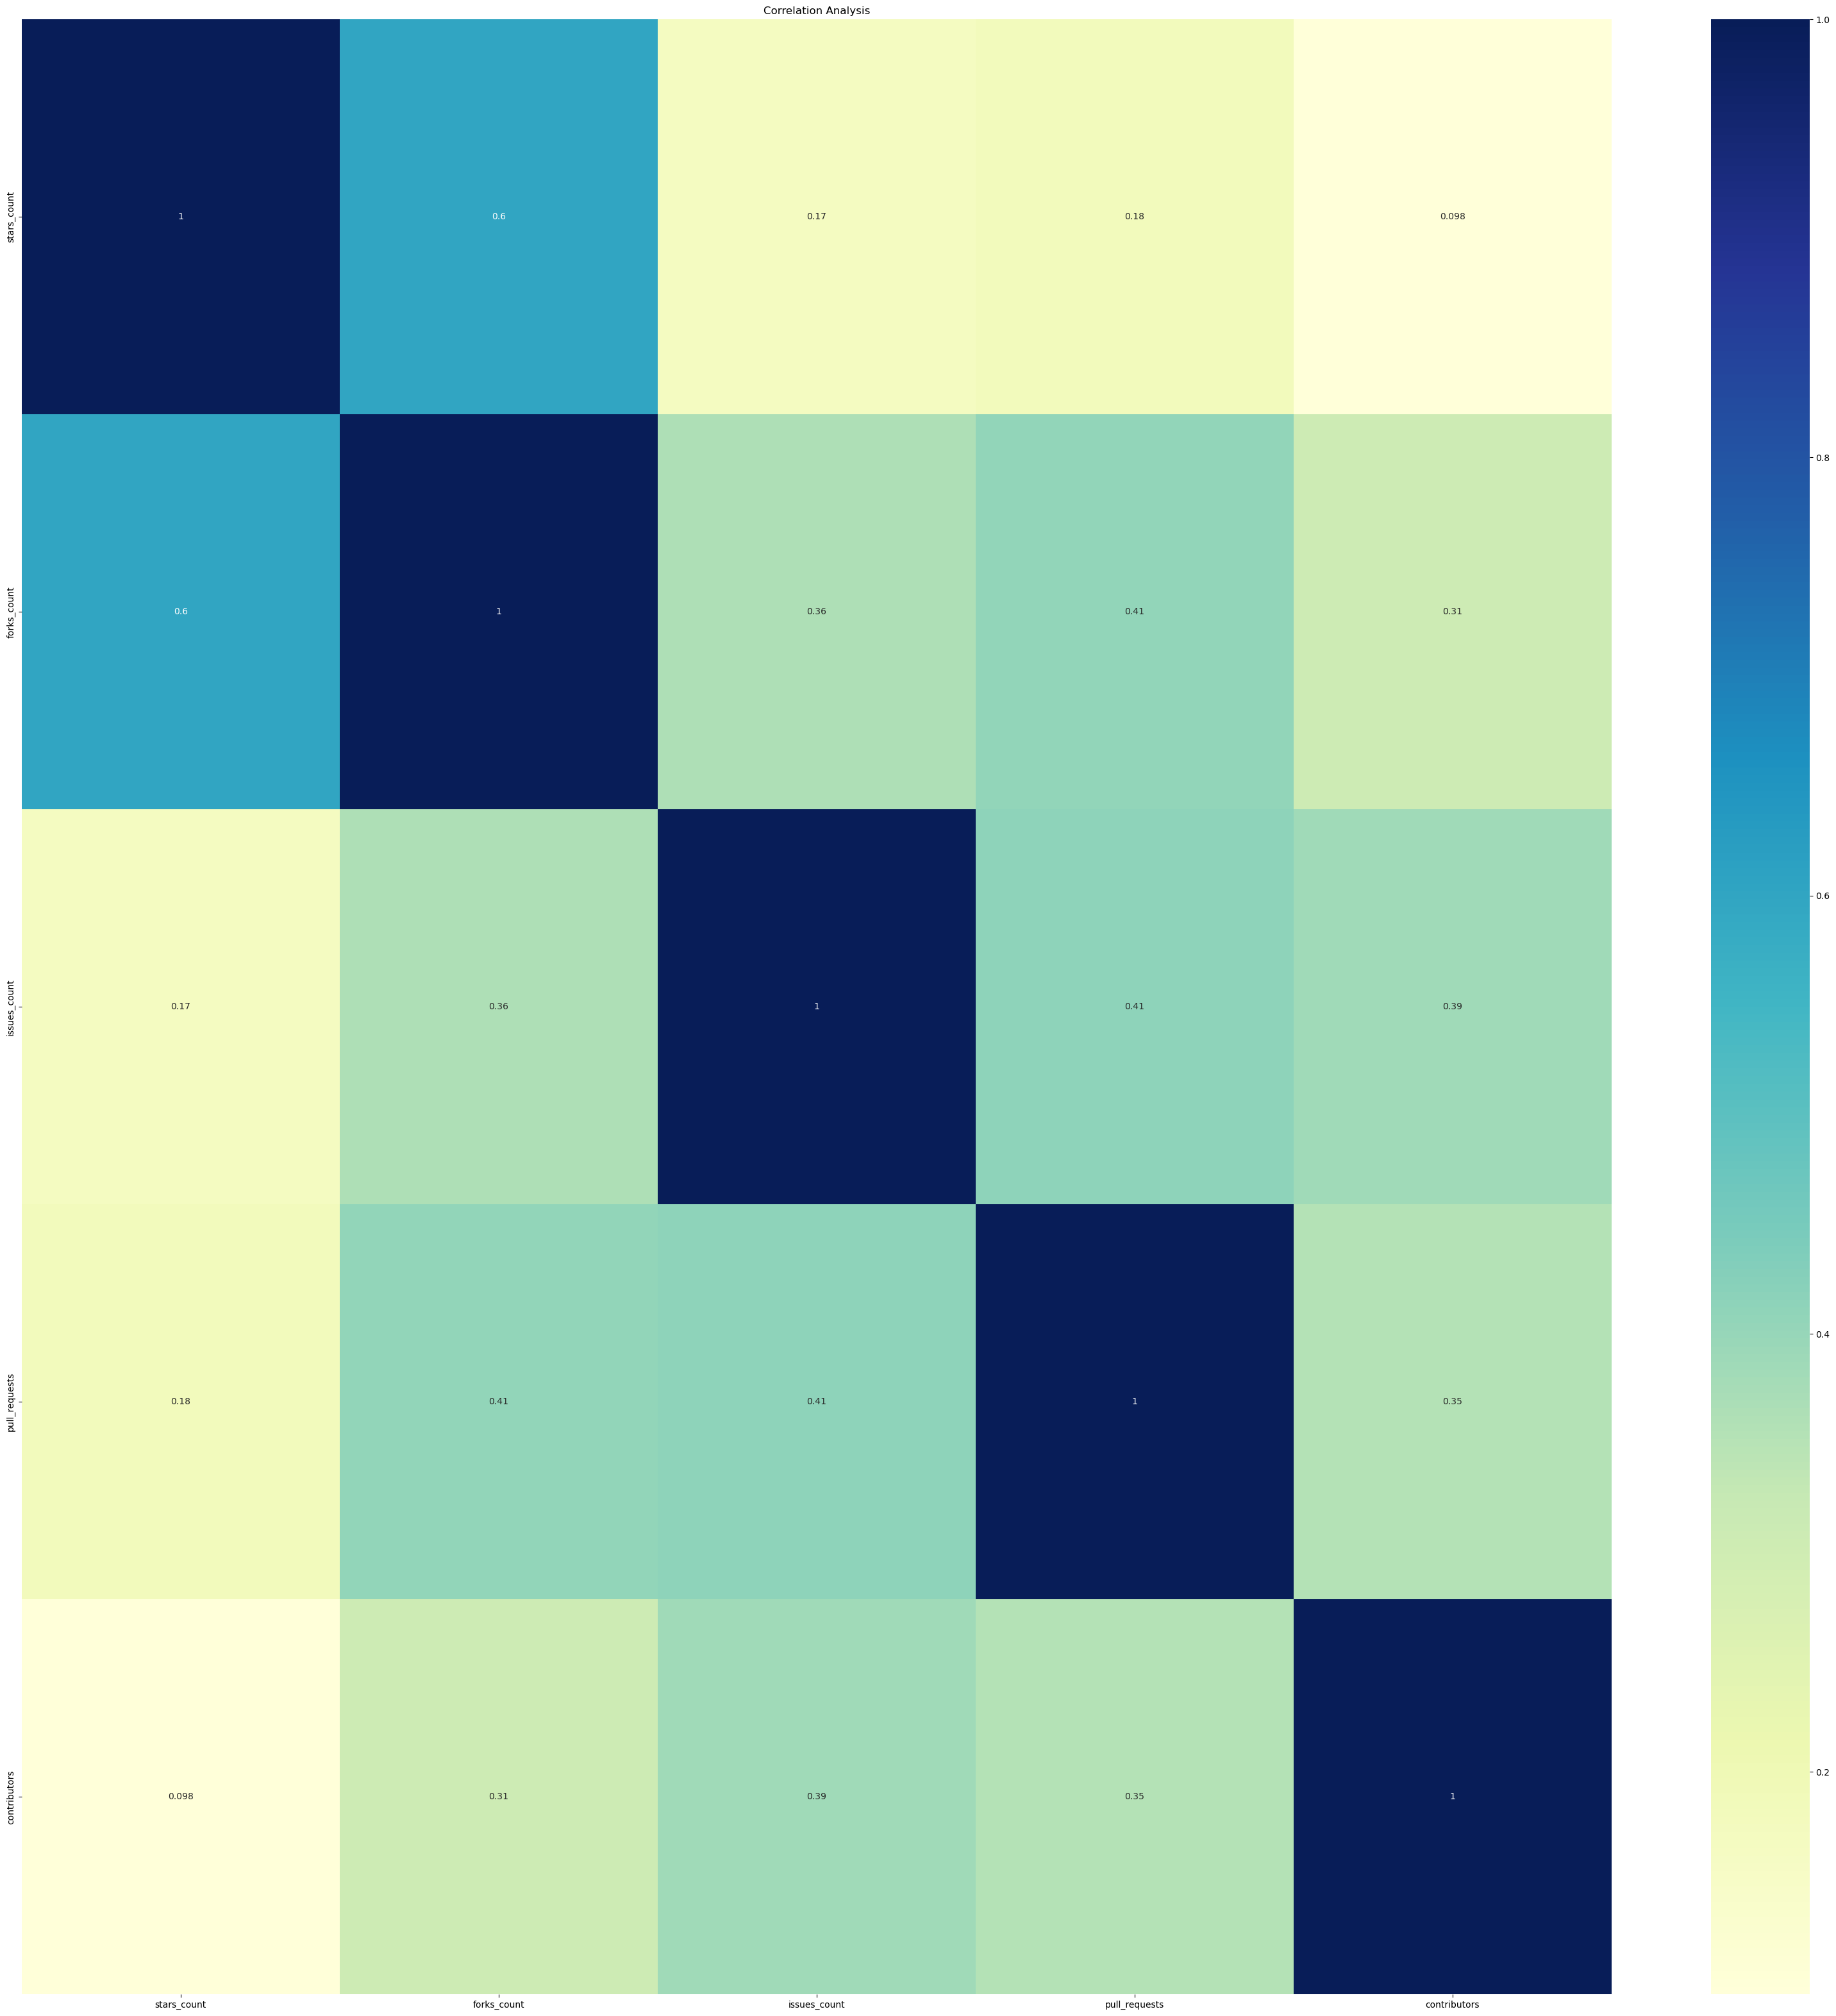

In [15]:
plt.figure(figsize=(40, 40))
sns.heatmap(repo_data_hf_replaced.corr(method='spearman'), cmap='YlGnBu', annot=True)
plt.title('Correlation Analysis')